# <center> <img src="figs/logo_facens.png" alt="Logo Facens" width="110" align="left"/>  <br/> <center>Facens<br/>
</p>

<br/>
  
<font size="3"><center>Prof. Julio Cesar Mastrodomenico</center></font>




# Aprendizado de Máquinas
### 2022PGS2M1
----

## Naive Bayes

Implementação e utilização do algoritimo Naive Bayes

$$ P(y_j|\vec{x}) = \hat{P}(y_{j}) \prod_{x_i \in \vec{x}} \hat{P}(x_{i} | y_{j}) $$

Banco de dados:
- Social_Network_Ads.csv
- Atrib_dataset.csv
- spam.csv
- titanic.csv


### Exercícios

In [1]:
# Exemplo de implementação

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importa o arquivo e guarda em um dataframe do Pandas
df_dataset = pd.read_csv('datasets/Atrib_dataset.csv', sep=',', index_col=None)

print('Dados carregados com sucesso!')

Dados carregados com sucesso!


In [2]:
# Visualização das 6 primeiras linhas do nosso dataset
df_dataset.head(n=6)

,Atrib1,Atrib2,Atrib3,Atrib4,Atrib5,Classe
0,0,0,1,1,0,0
1,0,1,1,0,1,1
2,1,1,1,0,0,1
3,0,0,0,0,0,0
4,1,1,1,0,1,1
5,0,1,1,1,0,1


In [3]:
# pega os valores das n-1 primeiras colunas e guarda em uma matrix X
X = df_dataset.iloc[:, 0:-1].values

# pega os valores da última coluna e guarda em um vetor Y
Y = df_dataset.iloc[:, -1].values

# imprime as 5 primeiras linhas da matriz X
print('X:', X[0:5,:])

# imprime os 5 primeiros valores de Y
print('Y:', Y[0:5])

X: [[0 0 1 1 0]
 [0 1 1 0 1]
 [1 1 1 0 0]
 [0 0 0 0 0]
 [1 1 1 0 1]]
Y: [0 1 1 0 1]


In [5]:
# Probabilidade das Classes
pPositivo = sum(Y==1)/len(Y)
pNegativo = sum(Y==0)/len(Y)

print('Probabilidade da classe ser 1 (Positivo): %1.2f%%' %(pPositivo*100))
print('Probabilidade da classe ser 0 (Negativo): %1.2f%%' %(pNegativo*100))

Probabilidade da classe ser 1 (Positivo): 54.00%
Probabilidade da classe ser 0 (Negativo): 46.00%


In [6]:
def calcular_probabilidades(X, Y):
    """
    CALCULARPROBABILIDADES Computa a probabilidade de ocorrencia de cada 
    atributo por rotulo possivel. A funcao retorna dois vetores de tamanho n
    (qtde de atributos), um para cada classe.
    
    CALCULARPROBABILIDADES(X, Y) calcula a probabilidade de ocorrencia de cada atributo em cada classe. 
    Cada vetor de saida tem dimensao (n x 1), sendo n a quantidade de atributos por amostra.
    """
    
    #  inicializa os vetores de probabilidades
    pAtrPositivo = np.zeros(X.shape[1])
    pAtrNegativo = np.zeros(X.shape[1])

    for i in range(len(X[0])):
        pAtrPositivo[i] = sum(Y[np.where(X[:,i]==1)]==1)/sum(Y==1)
        pAtrNegativo[i] = sum(Y[np.where(X[:,i]==1)]==0)/sum(Y==0)    
    
    ##########################################################################

    return pAtrPositivo, pAtrNegativo

pAtrPositivo, pAtrNegativo = calcular_probabilidades(X,Y)

print('A probabilidade esperada para P(Atributo1=1|Classe=1) = %.2f%%' %(pAtrPositivo[0]*100))

A probabilidade esperada para P(Atributo1=1|Classe=1) = 52.96%


In [7]:
def classificacao(x,pPositivo,pNegativo,pAtrPositivo,pAtrNegativo):
    """
    Classifica se a entrada x pertence a classe 0 ou 1 usando
    as probabilidades extraidas da base de treinamento. Essa funcao 
    estima a predicao de x atraves da maior probabilidade da amostra  
    pertencer a classe 1 ou 0. Tambem retorna as probabilidades condicionais
    de positivo e negativo, respectivamente.
    
    """

    #  inicializa a classe e as probabilidades condicionais
    classe = 0;
    probPositivo= 0;
    probNegativo = 0;
    
    probPositivo = np.prod(abs((1-x)-pAtrPositivo))*pPositivo
    probNegativo = np.prod(abs((1-x)-pAtrNegativo))*pNegativo
         
    if probPositivo>probNegativo:
        classe = 1
    else:
        classe = 0

    ########################################################################## 

    return classe, probPositivo, probNegativo 

resultados = np.zeros( X.shape[0] )

for i in range(X.shape[0]):
    resultados[i], probPositivo, probNegativo = classificacao(X[i,:],pPositivo,pNegativo,pAtrPositivo,pAtrNegativo)

# calcular acuracia
acuracia = np.sum(resultados==Y)/len(Y)

print('Acuracia obtida pelo seu classificador foi = %.2f%%\n' %( acuracia*100 ) )

Acuracia obtida pelo seu classificador foi = 76.60%



In [9]:
x1_novo = np.array([0,1,0,1,1])
abs((1-x1_novo)-pAtrPositivo)

array([0.47037037, 0.54074074, 0.36296296, 0.59259259, 0.65555556])

In [11]:
# Depois do modelo treinado, neste caso com as probabilidades calculadas, podemos
# predizer para um novo valor, seja ele x1_novo
x1_novo = np.array([0,1,0,0,1])

classe, probPositivo, probNegativo = classificacao(x1_novo, pPositivo, pNegativo, pAtrPositivo, pAtrNegativo)

if classe ==1:
    print('\n>>> Predicao = Positivo!')       
else:
    print('\n>>> Predicao = Negativo!')

print('\n>>>>>> Prob. Positivo = %0.6f!' %(probPositivo))
print('\n>>>>>> Prob. Negativo = %0.6f!\n\n'  %(probNegativo))


>>> Predicao = Positivo!

>>>>>> Prob. Positivo = 0.013314!

>>>>>> Prob. Negativo = 0.011289!




## Gaussian Naive Bayes

<img src="figs/gau_pdf.png" alt="Gaussian Probability Density Function" width="450" align="center"/>

In [12]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [24]:
data = datasets.load_iris()

In [25]:
X = data['data']
y = data['target']

In [18]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [39]:
def get_stats(X, y):
    
    # Criando os vetores
    n_samples, n_features = X.shape
    n_classes = len(np.unique(y))
    
    # Criando as matrizes
    mean = np.zeros((n_classes, n_features))
    variance = np.zeros((n_classes, n_features))
    priors = np.zeros(n_classes)
    
    for c in range(n_classes):
        
        X_c = X[y == c]
        
        mean[c, :] = np.mean(X_c, axis=0)
        variance[c, :] = np.var(X_c, axis=0)
        priors[c] = X_c.shape[0] / n_samples
        
    return mean, variance, priors, n_classes   

In [44]:
def gaussian_density(x, mean, var):
    const = 1 / np.sqrt(2 * np.pi * var)
    prob = np.exp(-0.5 * ((x - mean) ** 2 / var))
    return const * prob

In [45]:
def get_class_prob(x, mean, var, priors, n_classes):
    
    # Armazenar os posterior
    posteriors = list()
    
    for c in range(n_classes):
        mean_t = mean[c]
        var_t = var[c]
        prior_t = np.log(priors[c])
        
        posterior = np.sum(np.log(gaussian_density(x, mean_t, var_t)))
        posterior += prior_t # posterior = prior_t + posterior
        
        posteriors.append(posterior)
    
    # Retorna o argumento máximo
    return np.argmax(posteriors)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [61]:
mean, variance, priors, n_classes = get_stats(X_train, y_train)

In [64]:
mean

array([[5.02051282, 3.4025641 , 1.46153846, 0.24102564],
       [5.88648649, 2.76216216, 4.21621622, 1.32432432],
       [6.63863636, 2.98863636, 5.56590909, 2.03181818]])

In [65]:
variance

array([[0.12932281, 0.1417883 , 0.02031558, 0.01113741],
       [0.26387144, 0.1039737 , 0.2300073 , 0.04075968],
       [0.38918905, 0.10782541, 0.29451963, 0.06444215]])

In [66]:
priors

array([0.325     , 0.30833333, 0.36666667])

In [62]:
predictions = list()

for x in X_test:
    predictions.append(get_class_prob(x, mean, variance, priors, n_classes))

In [63]:
np.sum(y_test == predictions) / len(y_test)

0.9666666666666667

### Usando a biblioteca do Sklearn

In [67]:
df_dataset

,Atrib1,Atrib2,Atrib3,Atrib4,Atrib5,Classe
0,0,0,1,1,0,0
1,0,1,1,0,1,1
2,1,1,1,0,0,1
3,0,0,0,0,0,0
4,1,1,1,0,1,1
...,...,...,...,...,...,...
495,1,1,0,0,1,1
496,1,0,0,1,1,1
497,0,1,1,1,0,0
498,1,0,1,1,1,0


In [68]:
from sklearn.model_selection import train_test_split

In [70]:
# pega os valores das n-1 primeiras colunas e guarda em uma matrix X
X = df_dataset.iloc[:, 0:-1].values

# pega os valores da última coluna e guarda em um vetor Y
y = df_dataset.iloc[:, -1].values

In [71]:
# Vamos realizar a divisão do dataset, em treino e teste (validação)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [73]:
# Utilizando a BernoulliNB Naive Bayes
from sklearn.naive_bayes import BernoulliNB

# Instanciando a classe
classifier = BernoulliNB()

# Realizando o fit, que nada mais é que o treino
# do nosso algoritimo
classifier.fit(X_train, y_train)

BernoulliNB()

In [76]:
# Predizendo a classe do novo valor
x1 = np.array([[0,1,0,0,1],
              [0,0,0,1,0]])

In [77]:
classifier.predict(x1)

array([1, 0], dtype=int64)

In [78]:
# Realizando o predict do X_test com todos os valores
y_pred = classifier.predict(X_test)

In [79]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1], dtype=int64)

In [80]:
# Importando algumas métricas do sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[28 11]
 [18 43]]
0.71


## Métricas:

- Matriz de Confusão

<img src="figs/cm_wiki.png" width="250" height="250" />


- Acurácia

<img src="figs/acu_wiki.png" width="300" height="300" />


- Precisão

<img src="figs/precision.png" width="200" height="200" />


- recall

<img src="figs/recall.png" width="200" height="200" />


- Precisão / Recall

<img src="figs/Precisionrecall_img.png" width="300" height="300" />


- F-Beta Score

<img src="figs/f_score.png" width="200" height="200" />



In [89]:
y_test = np.array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0])
y_pred = np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [90]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[8 0]
 [1 1]]
0.9


In [91]:
f1_score(y_test, y_pred)

0.6666666666666666

In [93]:
precision_score(y_test, y_pred)

1.0

In [94]:
1 / (1 + 0)

1.0

In [95]:
recall_score(y_test, y_pred)

0.5

In [96]:
1 / (1 + 1)

0.5

In [97]:
2 * ((1 * 0.5)/(1 + 0.5))

0.6666666666666666

### Utilizando e visualizando com o Social Ads dataset

In [119]:
# Importando o dataset e separando as variáveis
dataset = pd.read_csv('datasets/Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [120]:
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [121]:
# Realizando o split do dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [122]:
# Vamos ver o que temos na variável X_train
X_train

array([[    27,  57000],
       [    46,  28000],
       [    39, 134000],
       [    44,  39000],
       [    57,  26000],
       [    32, 120000],
       [    41,  52000],
       [    48,  74000],
       [    26,  86000],
       [    22,  81000],
       [    49,  86000],
       [    36,  54000],
       [    40,  59000],
       [    41,  80000],
       [    26,  16000],
       [    39,  79000],
       [    59, 130000],
       [    42,  64000],
       [    53, 143000],
       [    34, 112000],
       [    57, 122000],
       [    39,  71000],
       [    47,  25000],
       [    24,  19000],
       [    36,  50000],
       [    32, 150000],
       [    48,  29000],
       [    30, 107000],
       [    60,  34000],
       [    38,  61000],
       [    33,  31000],
       [    39,  71000],
       [    55,  39000],
       [    49,  39000],
       [    43, 112000],
       [    27,  20000],
       [    26,  17000],
       [    37,  93000],
       [    42,  54000],
       [    35,  61000],


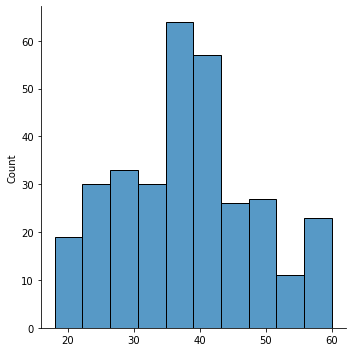

In [123]:
# Vamos observar a distribuição
sns.displot(X_train[:,0])

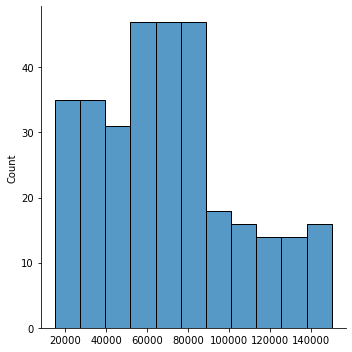

In [124]:
# Vamos observar a distribuição
sns.displot(X_train[:,1])

In [125]:
# Vamos realizar uma normalização devido a grande diferença nas grandezas
# Utilizaremos a biblioteca sklearn e a função StandardScaler
from sklearn.preprocessing import StandardScaler

# Instanciamos ela
sc = StandardScaler()

# Para utilizar precisamos realizar um fit e um transform, para que realize o calculo de normalização
# e aplique no X_train
X_train = sc.fit_transform(X_train)

# Posteriormente, só aplicamos no X_test
X_test = sc.transform(X_test)

In [126]:
# Observando novamente a variável
X_train

array([[-1.06675246, -0.38634438],
       [ 0.79753468, -1.22993871],
       [ 0.11069205,  1.853544  ],
       [ 0.60129393, -0.90995465],
       [ 1.87685881, -1.28811763],
       [-0.57615058,  1.44629156],
       [ 0.3069328 , -0.53179168],
       [ 0.99377543,  0.10817643],
       [-1.16487283,  0.45724994],
       [-1.55735433,  0.31180264],
       [ 1.0918958 ,  0.45724994],
       [-0.18366908, -0.47361276],
       [ 0.20881242, -0.32816546],
       [ 0.3069328 ,  0.28271318],
       [-1.16487283, -1.57901222],
       [ 0.11069205,  0.25362372],
       [ 2.07309956,  1.73718616],
       [ 0.40505317, -0.18271817],
       [ 1.4843773 ,  2.11534913],
       [-0.37990983,  1.21357589],
       [ 1.87685881,  1.50447048],
       [ 0.11069205,  0.02090805],
       [ 0.89565505, -1.31720709],
       [-1.36111358, -1.49174384],
       [-0.18366908, -0.5899706 ],
       [-0.57615058,  2.31897535],
       [ 0.99377543, -1.20084925],
       [-0.77239133,  1.06812859],
       [ 2.17121993,

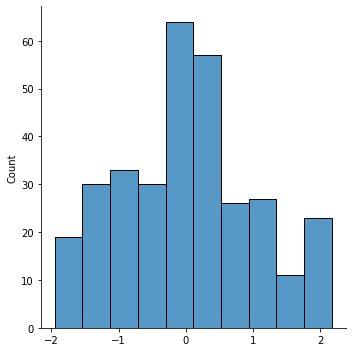

In [127]:
# Vamos observar a distribuição
sns.displot(X_train[:,0])

In [128]:
# Vamos treinar utilizando o GaussianNB novamente
from sklearn.naive_bayes import GaussianNB

# Instanciando
classifier = GaussianNB()

# Treinando
classifier.fit(X_train, y_train)

GaussianNB()

In [129]:
classifier.theta_

array([[-0.43830342, -0.28460223],
       [ 0.78132348,  0.5073344 ]])

In [130]:
classifier.class_prior_

array([0.640625, 0.359375])

In [131]:
# Com o algoritimo treinado, podemos predizer novos valores
# Como por exemplo, uma pessoa de 30 anos, com salario de 87000, compraria?
entrada = np.array([[30, 87000]])

# Para tal, precisamos transformar o valor para dentro da normalização e dai predizer
classifier.predict(sc.transform(entrada))

array([0], dtype=int64)

In [132]:
# Verificando a métrica final, com o resultado do X_test
y_pred = classifier.predict(X_test)

In [133]:
from sklearn.metrics import ConfusionMatrixDisplay

<AxesSubplot:>

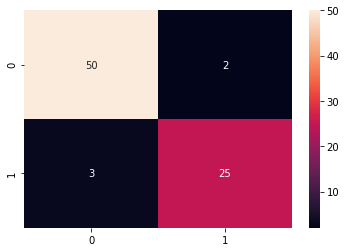

In [134]:
# Podemos visualizar também a matriz de confusão como um heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [135]:
disp = ConfusionMatrixDisplay(cm)

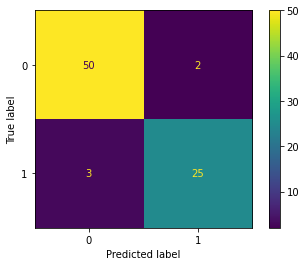

In [136]:
disp.plot()

### Vamos visualizar os resultados do treinamento e do teste

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


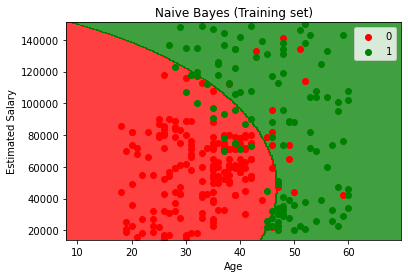

In [58]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Teste

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


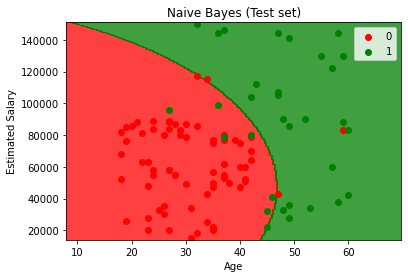

In [59]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Utilizando o dataset "Spam", aqui é necessária uma outra biblioteca para trabalhar a questão do texto

In [138]:
# Importando o csv para um pandas dataframe
df = pd.read_csv("datasets/spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [139]:
# Convertendo as variáveis categóricas para números
df['target'] = df['Category'].apply(lambda x: 1 if x=='spam' else 0)

In [140]:
df

,Category,Message,target
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [141]:
# Realizando o split dos nossos dados
X_train, X_test, y_train, y_test = train_test_split(df['Message'], df.target, random_state=42)

In [142]:
X_train

4281    WINNER!! As a valued network customer you have...
585     So how's scotland. Hope you are not over showi...
4545                  when you and derek done with class?
3034                          Aight, lemme know what's up
2758                Yo we are watching a movie on netflix
                              ...                        
3772    Hi, wlcome back, did wonder if you got eaten b...
5191                               Sorry, I'll call later
5226        Prabha..i'm soryda..realy..frm heart i'm sory
5390                           Nt joking seriously i told
860               Did he just say somebody is named tampa
Name: Message, Length: 4179, dtype: object

In [143]:
y_train

4281    1
585     0
4545    0
3034    0
2758    0
       ..
3772    0
5191    0
5226    0
5390    0
860     0
Name: target, Length: 4179, dtype: int64

In [144]:
# Aqui a biblioteca sklearn tem uma função chamada CountVectorizer, que transforma a ocorrência de 
# cada palavra em uma matriz esparsa
from sklearn.feature_extraction.text import CountVectorizer

# Instanciamos
vect = CountVectorizer()

# Realizamos a transformação dos valores, somente as características (X)
X_train_count = vect.fit_transform(X_train)

In [145]:
# Descrição da matriz criada
X_train_count

<4179x7489 sparse matrix of type '<class 'numpy.int64'>'
	with 55858 stored elements in Compressed Sparse Row format>

In [146]:
# Observando a dimensão da matriz
X_train_count.toarray().shape

(4179, 7489)

In [147]:
# Para este caso iremos utilizar o Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# Instanciamos nosso modelo
classifier = MultinomialNB()

# Treinando o modelo
classifier.fit(X_train_count, y_train)

MultinomialNB()

In [148]:
# Emails novos para ser predita a classe
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]

# Transformação do email em matriz esparsa
emails_count = vect.transform(emails)

# Predição
classifier.predict(emails_count)

array([0, 1], dtype=int64)

In [149]:
# Verificação do score do modelo através da acurácia
X_test_count = vect.transform(X_test)
classifier.score(X_test_count, y_test)

0.9885139985642498

In [150]:
y_pred = classifier.predict(X_test_count)
f1_score(y_test, y_pred)

0.956043956043956

In [151]:
len(y_test)

1393

In [34]:
# Teste da acurácia


## Exercício dataset Titanic

In [158]:
# Importando o csv para um pandas dataframe
df = pd.read_csv("datasets/titanic.csv")
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [159]:
# Pandas get Dummies
dummies = pd.get_dummies(df['Sex'], drop_first=True)
dummies.head()

,male
0,1
1,0
2,0
3,0
4,1


In [160]:
df_novo = pd.concat([df, dummies], axis='columns')

In [161]:
# Novo dataframe com os dummies
df_novo

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,male
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.0000,NaN,S,0,1
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.0000,B42,S,1,0
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.0000,C148,C,1,1


In [164]:
# Remoção de colunas não relevantes
df_novo.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin'], axis='columns', inplace=True)

In [165]:
df_novo

,Pclass,Age,SibSp,Parch,Fare,Embarked,Survived,male
0,3,22.0,1,0,7.2500,S,0,1
1,1,38.0,1,0,71.2833,C,1,0
2,3,26.0,0,0,7.9250,S,1,0
3,1,35.0,1,0,53.1000,S,1,0
4,3,35.0,0,0,8.0500,S,0,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,S,0,1
887,1,19.0,0,0,30.0000,S,1,0
888,3,NaN,1,2,23.4500,S,0,0
889,1,26.0,0,0,30.0000,C,1,1


In [166]:
df_novo['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [173]:
df_novo['Embarked'].value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

In [168]:
df_novo['Embarked'] = df_novo['Embarked'].fillna('S')

In [170]:
# Sklearn LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [171]:
# Instanciando o labelEncoder
le = LabelEncoder()

df_novo['Embarked'] = le.fit_transform(df_novo['Embarked'])

In [186]:
df_novo

,Pclass,Age,SibSp,Parch,Fare,Embarked,Survived,male
0,3,22.0,1,0,7.2500,2,0,1
1,1,38.0,1,0,71.2833,0,1,0
2,3,26.0,0,0,7.9250,2,1,0
3,1,35.0,1,0,53.1000,2,1,0
4,3,35.0,0,0,8.0500,2,0,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,2,0,1
887,1,19.0,0,0,30.0000,2,1,0
888,3,NaN,1,2,23.4500,2,0,0
889,1,26.0,0,0,30.0000,0,1,1


In [187]:
df_novo['Age'] = df_novo['Age'].fillna(df_novo.Age.mean())

In [188]:
sc = StandardScaler()

In [189]:
X = df_novo.drop(['Survived'], axis='columns').values
y = df_novo.Survived.values

In [190]:
X

array([[ 3.        , 22.        ,  1.        , ...,  7.25      ,
         2.        ,  1.        ],
       [ 1.        , 38.        ,  1.        , ..., 71.2833    ,
         0.        ,  0.        ],
       [ 3.        , 26.        ,  0.        , ...,  7.925     ,
         2.        ,  0.        ],
       ...,
       [ 3.        , 29.69911765,  1.        , ..., 23.45      ,
         2.        ,  0.        ],
       [ 1.        , 26.        ,  0.        , ..., 30.        ,
         0.        ,  1.        ],
       [ 3.        , 32.        ,  0.        , ...,  7.75      ,
         1.        ,  1.        ]])

In [191]:
X_norm = sc.fit_transform(X)

In [192]:
# Divisão em treino e teste/Validação
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, random_state=42)

In [193]:
X_train

array([[-1.56610693,  0.        , -0.4745452 , ..., -0.03431369,
         0.58595414,  0.73769513],
       [ 0.82737724, -0.36161755, -0.4745452 , ..., -0.50647211,
         0.58595414,  0.73769513],
       [-0.36936484, -0.4385719 , -0.4745452 , ..., -0.35646869,
         0.58595414, -1.35557354],
       ...,
       [ 0.82737724,  0.86965206,  1.34013193, ..., -0.36435545,
         0.58595414,  0.73769513],
       [-1.56610693, -1.20811541,  0.43279337, ...,  1.76774081,
         0.58595414, -1.35557354],
       [-1.56610693, -0.66943495, -0.4745452 , ...,  0.90773798,
         0.58595414,  0.73769513]])

In [195]:
# Treinando o modelo
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Vamos treinar utilizando o GaussianNB novamente
# Instanciando
classifier_naive = GaussianNB()
classifier_tree = DecisionTreeClassifier()

# Treinando
classifier_naive.fit(X_train, y_train)
classifier_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [196]:
# Medindo o score em relação a uma métrica
y_naive = classifier_naive.predict(X_test)
y_tree = classifier_tree.predict(X_test)

In [197]:
print('Naive: ', f1_score(y_test, y_naive))
print('Trees: ',f1_score(y_test, y_tree))

Naive:  0.7419354838709679
Trees:  0.6703910614525139


In [199]:
from sklearn.metrics import classification_report

In [200]:
# Classification report
print(classification_report(y_test, y_naive))

              precision    recall  f1-score   support

           0       0.84      0.79      0.82       134
           1       0.71      0.78      0.74        89

    accuracy                           0.78       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.78      0.79       223



## Exercício dataset Wine ( direto do sklearn )

$ from sklearn import datasets

$ wine = datasets.load_wine()

In [201]:
from sklearn import datasets
wine = datasets.load_wine(as_frame=True)

In [202]:
wine

{'data':      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
 0      14.23        1.71  2.43               15.6      127.0           2.80   
 1      13.20        1.78  2.14               11.2      100.0           2.65   
 2      13.16        2.36  2.67               18.6      101.0           2.80   
 3      14.37        1.95  2.50               16.8      113.0           3.85   
 4      13.24        2.59  2.87               21.0      118.0           2.80   
 ..       ...         ...   ...                ...        ...            ...   
 173    13.71        5.65  2.45               20.5       95.0           1.68   
 174    13.40        3.91  2.48               23.0      102.0           1.80   
 175    13.27        4.28  2.26               20.0      120.0           1.59   
 176    13.17        2.59  2.37               20.0      120.0           1.65   
 177    14.13        4.10  2.74               24.5       96.0           2.05   
 
      flavanoids  nonflavanoid

## Árvore de Decisão

Vamos utilizar agora o algoritimo da árvore de decisão para resolver os mesmos problemas

<img src="figs/arvore_dec.png" width="600" height="600" />



### Exercícios

In [204]:
# Import do dataset
dataset = pd.read_csv('datasets/Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [205]:
X_norm = sc.fit_transform(X)

# Realizando o train test split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, random_state=42)

In [49]:
# Normalizando os dados
# Instanciamos ela


# Para utilizar precisamos realizar um fit e um transform, para que realize o calculo de normalização
# e aplique no X_train


# Posteriormente, só aplicamos no X_test


In [206]:
# Instanciando e treinando a árvore de decisão
trees = DecisionTreeClassifier()
trees.fit(X_train, y_train)

DecisionTreeClassifier()

In [208]:
# Verificando a metrica
y_pred = trees.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87        63
           1       0.78      0.76      0.77        37

    accuracy                           0.83       100
   macro avg       0.82      0.81      0.82       100
weighted avg       0.83      0.83      0.83       100



In [211]:
# Predict de um novo valor
x_new = np.array([[50, 120000]])

# transform antes do predict
trees.predict(sc.transform(x_new))

array([1], dtype=int64)

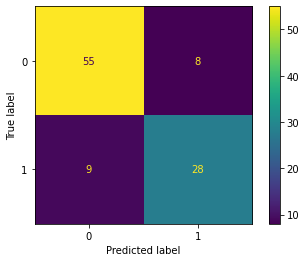

In [212]:
# Utilize o Confusion Matrix Display para verificar
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Visualizando os resultados

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


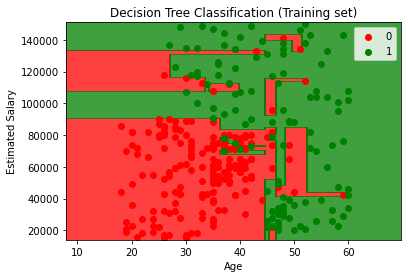

In [233]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Teste

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


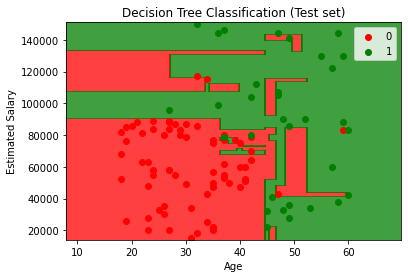

In [234]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Vamos realizar os mesmos exercícios utilizando decision trees para verificar se melhora os resultados

### Titanic

In [236]:
# Import do dataset
df_titanic = pd.read_csv('datasets/titanic.csv')

In [237]:
df_titanic

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.0000,C148,C,1


In [ ]:
# Remoção de colunas não relevantes


### Wine dataset

In [1]:
from sklearn import datasets
wine = datasets.load_wine(as_frame=True)

In [3]:
wine

{'data':      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
 0      14.23        1.71  2.43               15.6      127.0           2.80   
 1      13.20        1.78  2.14               11.2      100.0           2.65   
 2      13.16        2.36  2.67               18.6      101.0           2.80   
 3      14.37        1.95  2.50               16.8      113.0           3.85   
 4      13.24        2.59  2.87               21.0      118.0           2.80   
 ..       ...         ...   ...                ...        ...            ...   
 173    13.71        5.65  2.45               20.5       95.0           1.68   
 174    13.40        3.91  2.48               23.0      102.0           1.80   
 175    13.27        4.28  2.26               20.0      120.0           1.59   
 176    13.17        2.59  2.37               20.0      120.0           1.65   
 177    14.13        4.10  2.74               24.5       96.0           2.05   
 
      flavanoids  nonflavanoid

In [4]:
#Verificar se existe valores NAN
wine['data'].head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [8]:
check = wine['data'].isnull().values.any()

check_for_any_nan= wine['data'].isna().any().any()
total_nan_values = wine['data'].isna().sum().sum()

print("NaN Presence:"+str(check_for_any_nan))
print ("Total Number of NaN values:"+str(total_nan_values))

NaN Presence:False
Total Number of NaN values:0


In [13]:
X = wine['data']
y = wine['target']

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB

In [14]:
# Separar em treino e validação, normalizar os dados
sc = StandardScaler()
X_norm = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, random_state=42)

In [17]:
classifier = BernoulliNB()
classifier.fit(X_train, y_train)

BernoulliNB()

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [20]:
y_pred = classifier.predict(X_test)

In [31]:
# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão")
print(cm)

# Acurácia
acc = accuracy_score(y_test, y_pred)
print("Acurácia", acc)

# F1
f1 = f1_score(y_test, y_pred, average='micro')
print("F1", f1)

# Precision Score
ps = precision_score(y_test, y_pred, average='micro')
print("Precision Score", ps)

# Recall
recall = recall_score(y_test, y_pred, average='micro')
print("Recall",recall)

Matriz de Confusão
[[15  0  0]
 [ 1 16  1]
 [ 0  0 12]]
Acurácia 0.9555555555555556
F1 0.9555555555555556
Precision Score 0.9555555555555556
Recall 0.9555555555555556


In [32]:
from sklearn.metrics import classification_report

In [33]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.89      0.94        18
           2       0.92      1.00      0.96        12

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



## Regression trees com Boston Housing